In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826    #kJ/mol
deltaS_298=188.835     #J/mol

dT=0.1
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [24]:
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830    #kJ/mol
deltaS_298=69.95    #J/mol

dT=0.1
T=np.arange(300,400,dT)
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

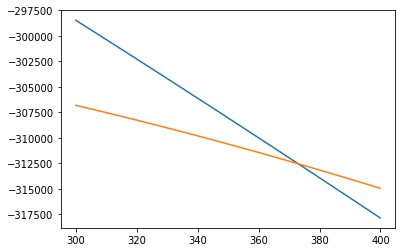

In [25]:
plt.plot(T,deltaG_gas)
plt.plot(T,deltaG_liq)
plt.show()

In [27]:
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp)
np.where(dp==minimo)

(array([730]),)

In [28]:
T[730]

373.0000000000166

In [50]:
import requests

In [51]:
def leerArchivo(url):
    file=requests.get(url)
    datos=file.text
    datos=datos.split("\n")[3:-1]
    mat=[]
    for x in datos:
        s=x.split("\t")
        mat.append([float(a)for a in s])
    mat=np.array(mat)
    return mat

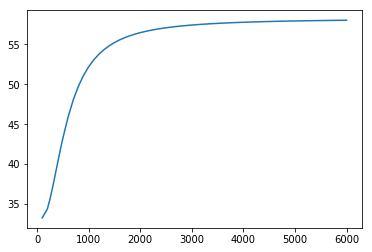

In [52]:
mat=leerArchivo("https://janaf.nist.gov/tables/N-007.txt")
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [53]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ 16.10851352,  75.89539116, -54.3872296 ,  14.30775044,
         0.23942371])

In [54]:
Cp_calc=beta.dot(X.T)

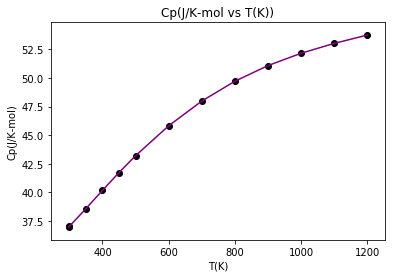

In [61]:
plt.plot(T,Cp_calc,color="purple")
plt.scatter(T,y,c="black")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.title("Cp(J/K-mol vs T(K))")
plt.show()

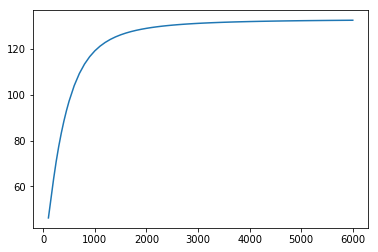

In [45]:
mat=leerArchivo("https://janaf.nist.gov/tables/N-032.txt")
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()